Data:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

Load the dataset<p>
Perform exploratory data analysis


1. Target variable distribution
2. Examine missing values
3. Examine data types
4. Examine data distribution
5. Examine data intercorrelations


<p>
5 pts.



In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import math
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


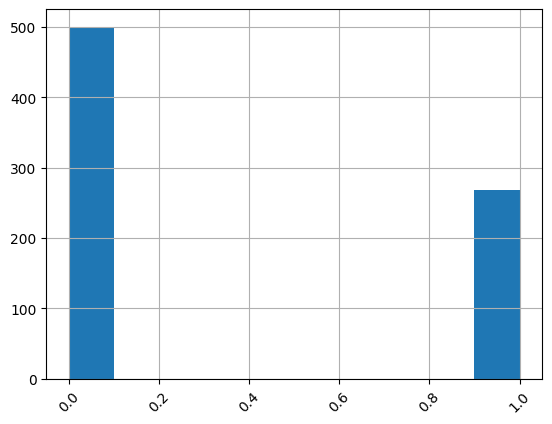

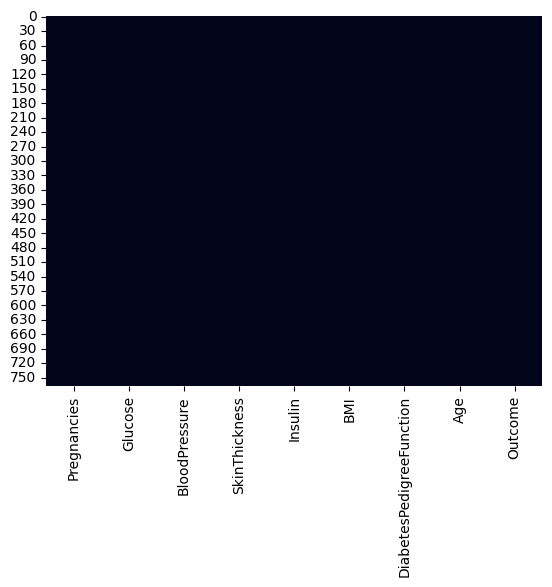

<Figure size 640x480 with 0 Axes>

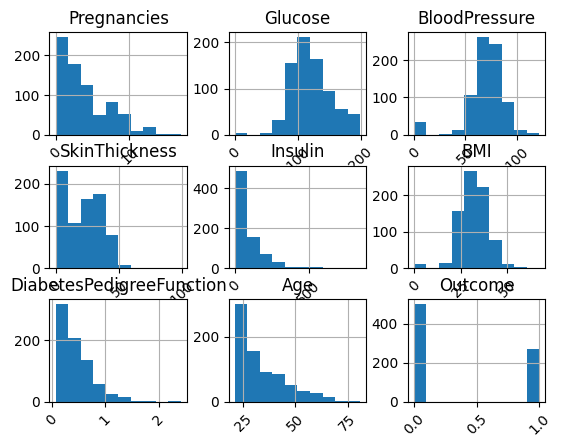

<Figure size 640x480 with 0 Axes>

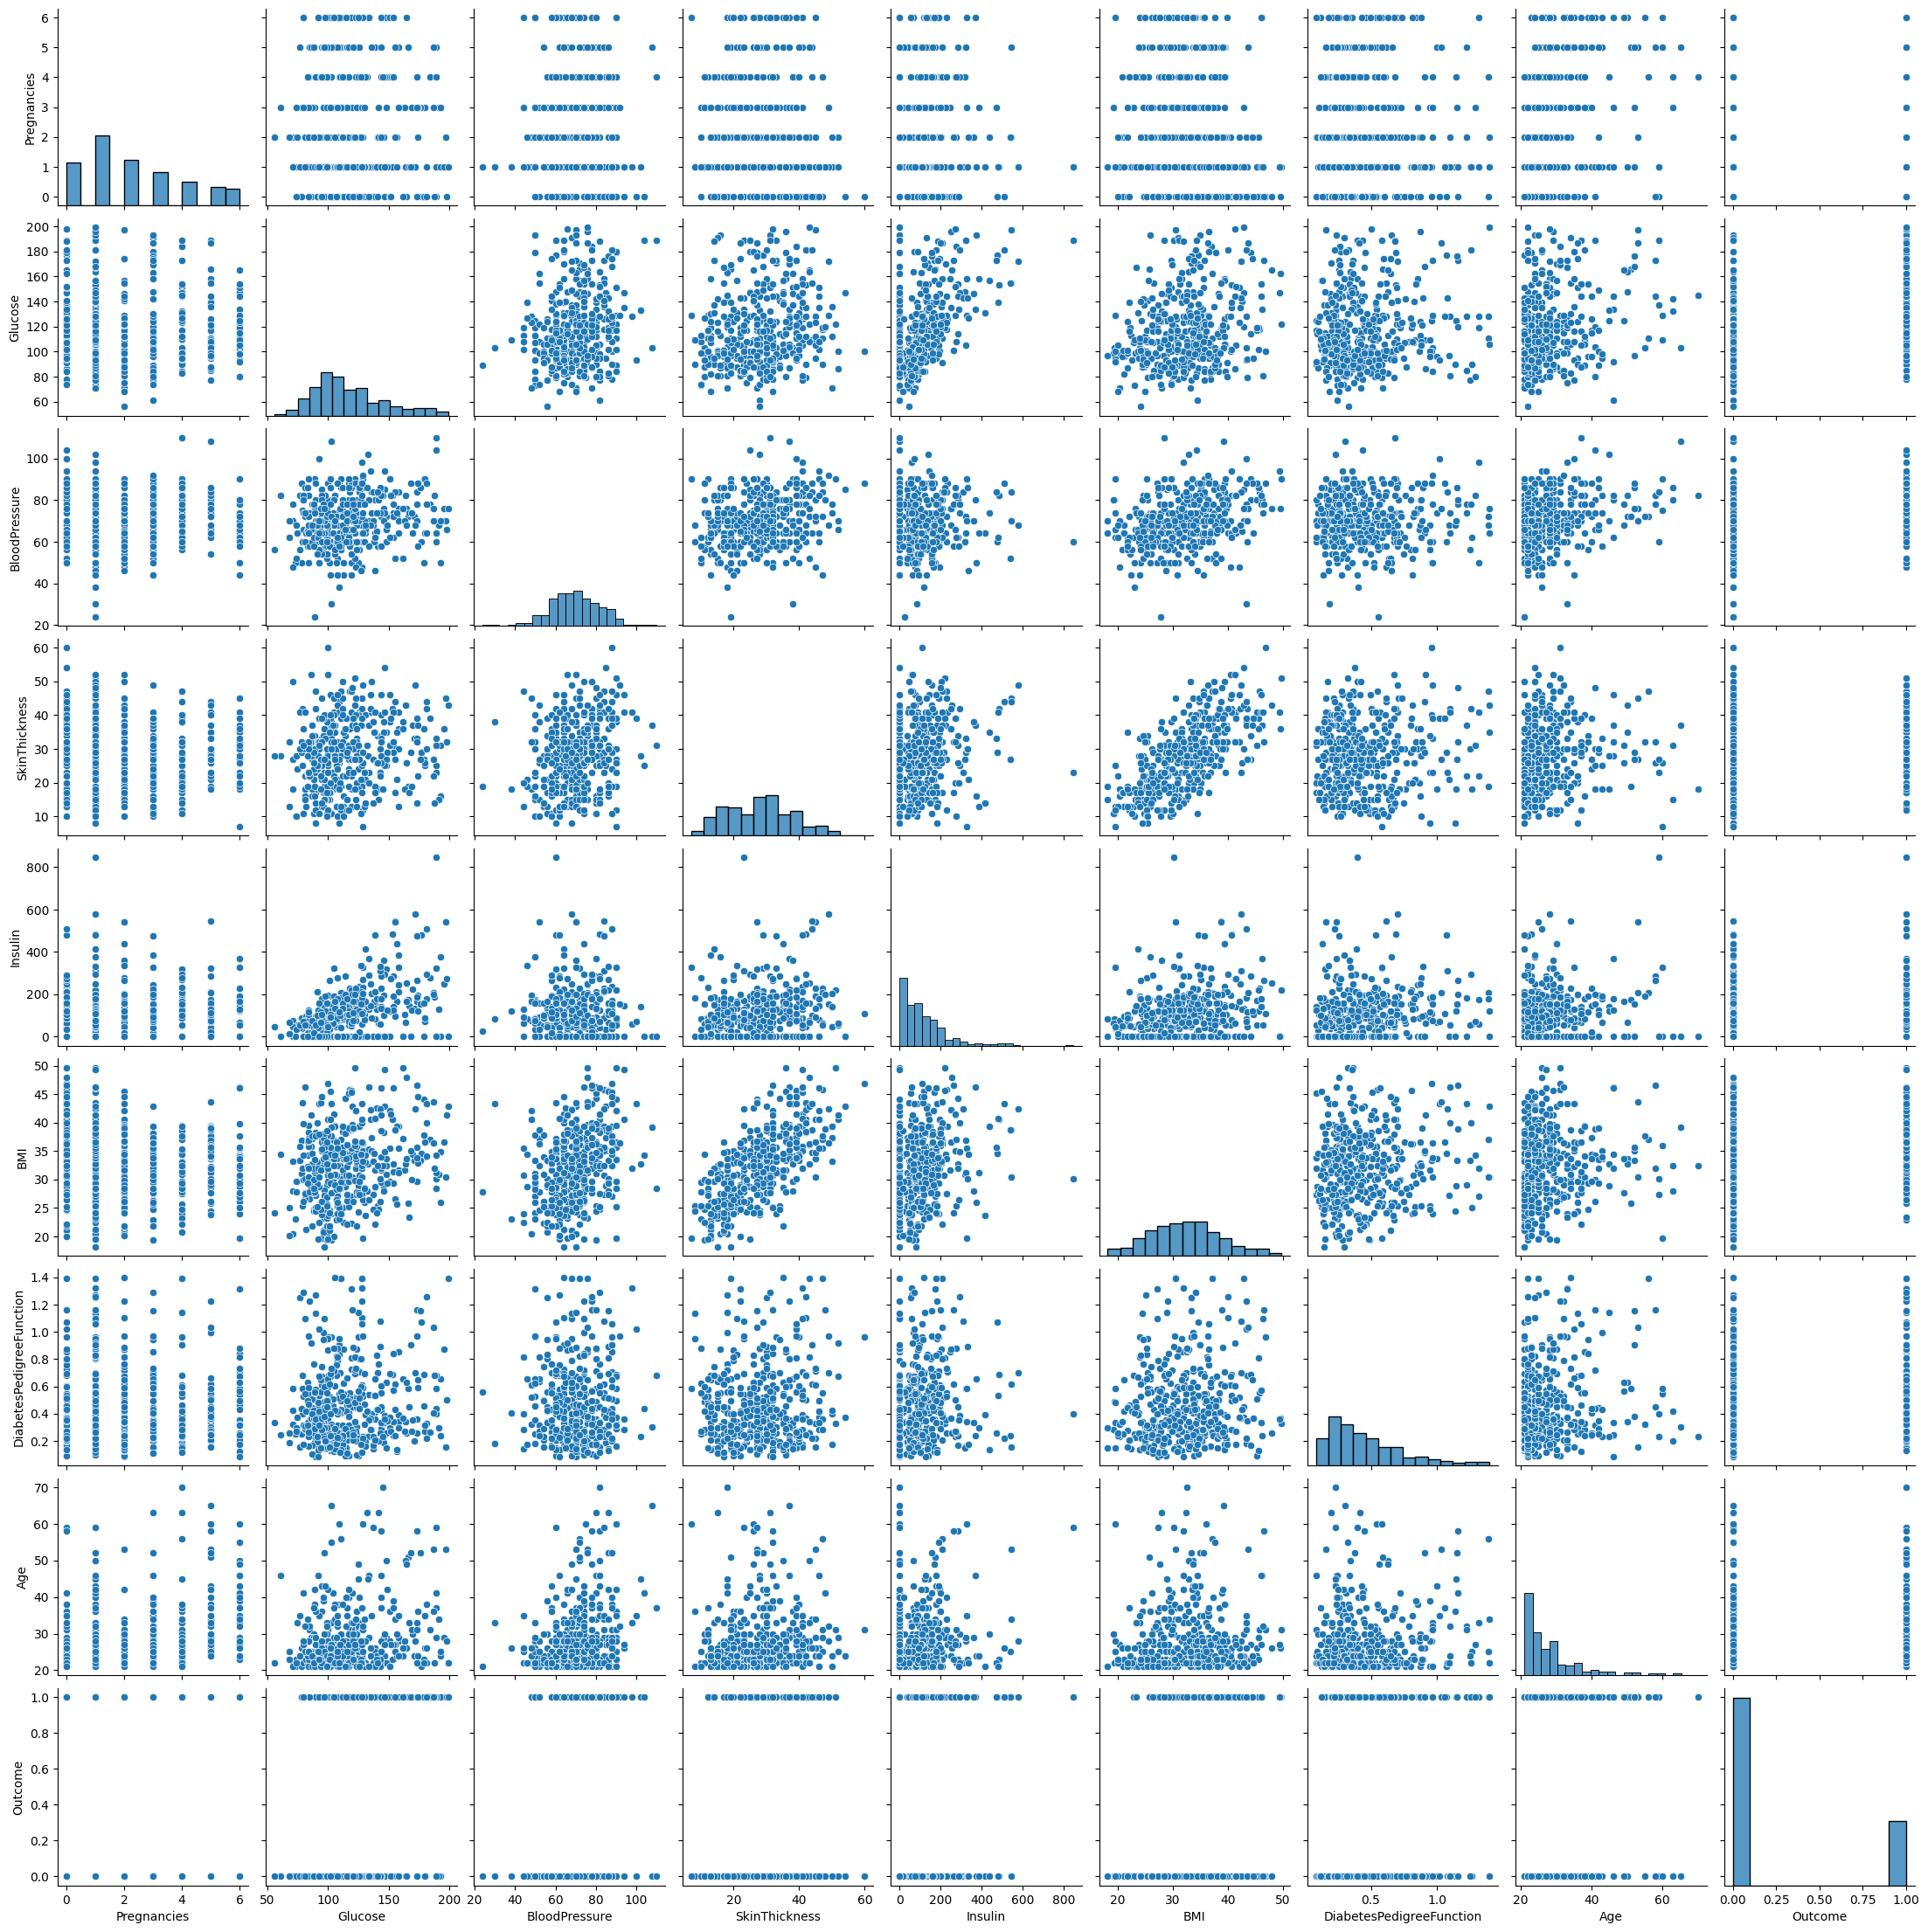

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()
df['Outcome'].hist(xrot = 45.0)
plt.figure()
sns.heatmap(df.isnull(), cbar=False)
df.info()
plt.figure()
df.hist(xrot = 45.0)
df.drop(df[df['BMI'] < 0.1 ].index, inplace=True)
df.drop(df[df['BloodPressure'] < 0.1 ].index, inplace=True)
df.drop(df[df['SkinThickness'] < 0.1 ].index, inplace=True)
df.drop(df[df['Glucose'] < 0.1 ].index, inplace=True)
df.drop(df[df['SkinThickness'] > 60 ].index, inplace=True)
df.drop(df[df['Age'] > 75 ].index, inplace=True)
df.drop(df[df['DiabetesPedigreeFunction'] > 1.5 ].index, inplace=True)
df.drop(df[df['Pregnancies'] > 6.5 ].index, inplace=True)
df.drop(df[df['BMI'] > 49.9 ].index, inplace=True)
plt.figure()
sns.pairplot(df)

Split data 70/30 into training and test datasets.<p>
Build a logistic regression model to predict diabetes<p>

5 pts.

In [3]:
import statsmodels.api as sm
x = df[[ 'Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

Evaluate model performance. <p>
Display the confusion matrix.<p>
Report the following metrics:

1.   ROC AUC
2.   Accuracy
<li>Recall
<li>Precision
<li>Display the ROC curve.
<p>

5 pts.





Optimization terminated successfully.
         Current function value: 0.517349
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Outcome          Pseudo R-squared: 0.083     
Date:               2024-01-21 19:25 AIC:              310.0625  
No. Observations:   290              BIC:              328.4119  
Df Model:           4                Log-Likelihood:   -150.03   
Df Residuals:       285              LL-Null:          -163.62   
Converged:          1.0000           LLR p-value:      1.8230e-05
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Glucose            0.0251   0.0053  4.7174 0.0000  0.0147  0.0355
BloodPressure     -0.0632   0.0127 -4.9867 0.0000 -0.0881 -0.0384


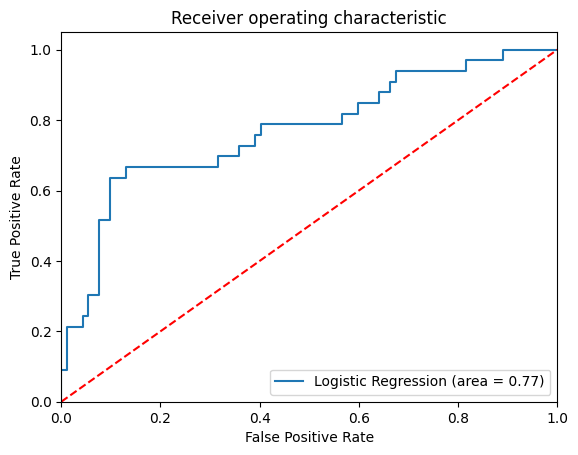

In [4]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Determine which features have no effect on the Outcome (Hint: you will need to use statsmodels). <p>

    Insulin, pregnancies, and DiabetePedigreeFunction all have no effect on the outcome, as shown by their p-values above 0.05.


Exclude  features with non-statistically significant effects in the model, rebuild the model and assess how the reduced feature set affects model performance.

    The model performed slightly worse after taking the three features out. The AUC got slightly smaller, from 0.79 to 0.77, the prescision dropped by 3, f1-score dropped by 1, and accuracy dropped by 2. Also there were more false positives predicted.

5 pts.

In [5]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.523118
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  415
Model:                          Logit   Df Residuals:                      410
Method:                           MLE   Df Model:                            4
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                 0.07936
Time:                        19:25:38   Log-Likelihood:                -217.09
converged:                       True   LL-Null:                       -235.81
Covariance Type:            nonrobust   LLR p-value:                 1.469e-07
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Glucose           0.0243      0.004      5.549      0.000       0.016       0.033
BloodPressure    -0.